# Домашнее задание. Титаник
В этом домашнем задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic.>ссылке</a>.

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

In [271]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
data = pd.read_csv('/content/drive/My Drive/titanic_data.csv', index_col='PassengerId')

In [273]:
basic_features = data.columns

y = pd.read_csv('/content/drive/My Drive/titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [274]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [275]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

Посмотрим на рспределение по полу в процентом соотношении:

In [276]:
data['Sex'].value_counts(normalize=True) * 100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

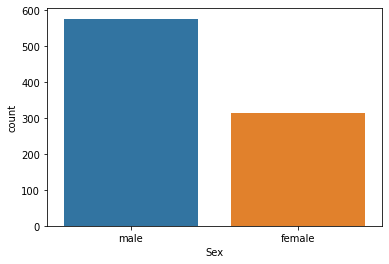

In [277]:
sns.countplot('Sex',data=data, )
plt.show()

Посчитаем распределение по классам в процентах:

In [278]:
data['Pclass'].value_counts(normalize=True) * 100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

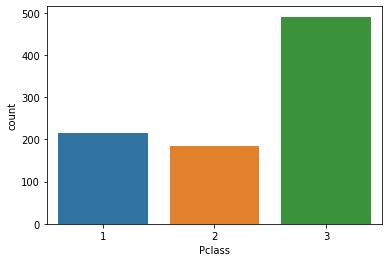

In [279]:
sns.countplot('Pclass',data=data, orient='h' )
plt.show()

Посчитаем долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин:

In [280]:
data.groupby(['Sex'])['Survived'].sum()/data.groupby(['Sex'])['Survived'].count()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [281]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Выжили 233 женщины из 314. А из 577 мужчин 109 выжили. Процент выживших у женщин 74,2%, у мужчин 18,9%

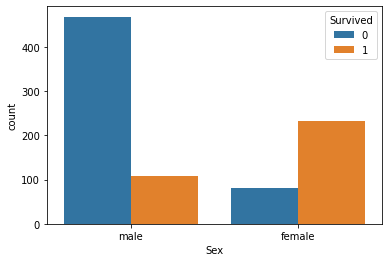

In [282]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.show()

Посчитаем долю выживших в разбивке по по классу.

In [283]:
data.groupby(['Pclass'])['Survived'].sum()/data.groupby(['Pclass'])['Survived'].count()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [284]:
data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [285]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

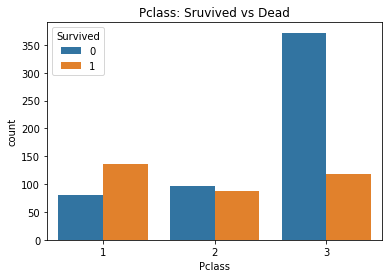

In [286]:
sns.countplot('Pclass', hue='Survived', data=data)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

Видно что доля выживших в первой классе выше, чем погибших, около 63%. Больше всего погибших в 3 классе 372 человека. Оказавшись в 3 классе верояность выжить была значительно меньше, около 24%.

Построим распределение возраста пассажиров:

Text(0.5, 1.0, 'Agewise distribution of the passenger aboard the Titanic')

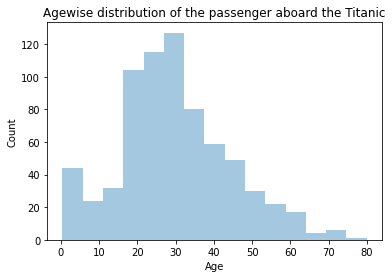

In [287]:
sns.distplot(data['Age'].dropna(), bins=15, kde=False)
plt.ylabel('Count')
plt.title('Agewise distribution of the passenger aboard the Titanic')

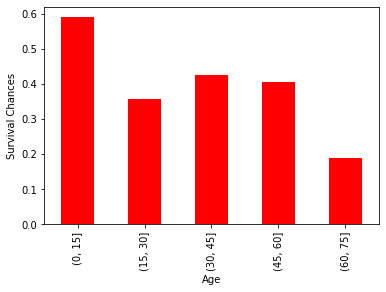

In [288]:
group_age_split = pd.cut(data['Age'], np.arange(0, 80, 15))
age_grouping = data.groupby(group_age_split).mean()
age_grouping['Survived'].plot.bar(color = 'red')
plt.ylabel("Survival Chances")
plt.show()

In [289]:
age_grouping

,Pclass,Age,SibSp,Parch,Fare,Survived
Age,,,,,,
"(0, 15]",2.626506,6.369518,1.734940,1.265060,32.785795,0.590361
"(15, 30]",2.426380,23.262270,0.355828,0.263804,28.015413,0.358896
"(30, 45]",2.108911,36.915842,0.366337,0.440594,41.265077,0.425743
"(45, 60]",1.567901,51.648148,0.358025,0.271605,45.332410,0.407407
"(60, 75]",1.619048,65.357143,0.142857,0.285714,41.912700,0.190476


Многие пассажиры в возрасте 15-45 лет. Самый высокий шанс выжить у детей в возрасте от 0 до 15 лет около 59%. Самый маленький у пожилых чей возраст больше 60 лет около 19%.

Посмотрим на распределение в разбивке по полу.

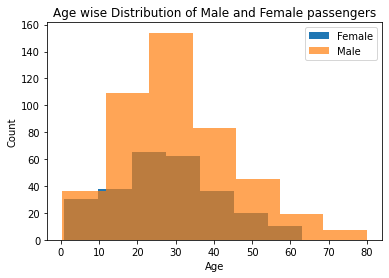

In [290]:
plt.hist(data['Age'][(data['Sex'] == 'female')].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(data['Age'][(data['Sex'] == 'male')].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female passengers')
plt.legend()

Построим распределение возраста для выживших и невыживших пассажиров.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


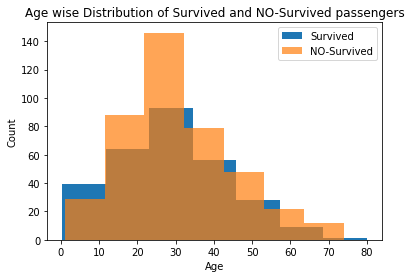

In [291]:
plt.hist(data['Age'][(data['Survived'] == 1)], bins=7, label='Survived', histtype='stepfilled')
plt.hist(data['Age'][(data['Survived'] == 0)], bins=7, label='NO-Survived', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Survived and NO-Survived passengers')
plt.legend()

у невыживших есть ярко выраженная мода в районе 22-32 лет.

## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках: 

In [292]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [293]:
data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [294]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

Проверим

In [295]:
data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Survived    0
dtype: int64

## Подготовка плана тестирования

### Задание 2. (0 баллов)
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [296]:
# Для удобства разделение на трей тест сплит буду делать позже, после преобразования некоторые стобцов и добавления новых признаков, это будет удобнее
# from sklearn.model_selection import train_test_split
# data_train, data_test = train_test_split(data, test_size = 0.3)

In [297]:
data.shape

(891, 11)

## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас. 

Указания: 
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [298]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0


In [299]:
data['Cabin']

PassengerId
1         0
2       C85
3         0
4      C123
5         0
       ... 
887       0
888     B42
889       0
890    C148
891       0
Name: Cabin, Length: 891, dtype: object

In [300]:
def get_cabin_letter(row):
    return row['Cabin'][0]

data['cabin_type'] = data.apply(get_cabin_letter, axis=1)

Сюда добавьте описание вашего нового признака

Добавим новый стобец 'title_name' который отражает семейное положение человека. Вытащим эти данные из признака  'Name'

In [301]:
#первый вариант создания стобца
# train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [302]:
def extract_title_name(row): #rename this function appropriately
    return row['Name'].split(',')[1].split('.')[0].strip()

data['title_name'] = data.apply(extract_title_name, axis=1)

In [303]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type,title_name
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0,Mr


In [304]:
data['title_name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Don               1
Ms                1
Jonkheer          1
Mme               1
Capt              1
Lady              1
the Countess      1
Sir               1
Name: title_name, dtype: int64

Заменим все редкие обращения на более частотные, объеденив их в группы.

In [305]:
data['title_name'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
# Substitute rare male titles
data['title_name'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)


In [306]:
data['title_name'].value_counts()

Mr        525
Miss      188
Mrs       125
Master     40
Dr          7
Rev         6
Name: title_name, dtype: int64

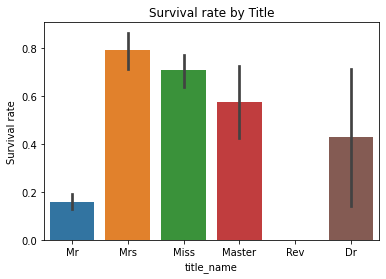

In [307]:
plt.title('Survival rate by Title')
g = sns.barplot(x='title_name', y='Survived', data=data).set_ylabel('Survival rate')

## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 


Определим стобцы для one hot encoding

In [311]:
to_dummies = [
    'Sex',
    'Embarked',
    'cabin_type',
    'title_name',
    'Pclass'
]

Запускаем get_dummies

In [312]:
data_preprocessed = pd.get_dummies(data, columns=to_dummies, drop_first=True)

Удалим дублирующие информацию столбцы

In [313]:
data_preprocessed.drop(['Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

**Вот сейчас применяю трейн тест сплит**

In [324]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [314]:
target = 'Survived'

In [315]:
X_train, X_test, y_train, y_test = train_test_split(
    data_preprocessed.drop(target, axis=1), 
    data_preprocessed[target], 
    test_size=0.30, 
    random_state=42, 
    stratify=data_preprocessed[target]
)

Перед запуском моделей нормализуем колличественные переменные

In [323]:
numerical = ['Age', 'SibSp', 'Parch', 'Fare']

In [327]:
# стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical])
X_test_scaled = scaler.transform(X_test[numerical])

X_train[numerical] = X_train_scaled
X_test[numerical] = X_test_scaled

## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

Напишем функцию для подсчета точности модели

In [357]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

Напишем функцию построения ROC - кривой

In [378]:
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

Определим самый наивный baseline

In [359]:
y_naive_pred = np.random.choice(
    [0, 1], 
    len(y_train), 
    p=y_train.value_counts(normalize=True).values) #рандомом выбираем между 1 и 0

Посмотрим на точность наивного baseline

In [360]:
quality_report(y_naive_pred, y_train)

Accuracy: 0.507
Precision: 0.393
Recall: 0.367
f1_score: 0.380


Второй baseline запустим Knn алгоритм

In [368]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_naive_knn = knn.predict(X_train_scaled)

    
quality_report(y_naive_knn, y_train)

Accuracy: 0.780
Precision: 0.636
Recall: 0.752
f1_score: 0.689


Наивный knn без подбора гиперпараметра оказался лучше чем раномный выбор.

### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

In [ ]:
<YOUR CODE>

## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

**Запустим перебор параметров на knn с помощью GridSearchCV**

А также посмотрим на точность по тестовой выборке

In [388]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search_knn.fit(X_train, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search_knn.best_score_, grid_search_knn.best_estimator_.n_neighbors)
) 


test_predictions_knn = grid_search_knn.best_estimator_.predict(X_test)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions_knn, y_test)))

Best CV score: 0.768, best CV k: 7
Resulting test score: 0.753
CPU times: user 15 s, sys: 2.44 ms, total: 15 s
Wall time: 15 s


на трейн выборке

In [389]:
quality_report(grid_search_knn.best_estimator_.predict(X_train), y_train)

Accuracy: 0.854
Precision: 0.745
Recall: 0.856
f1_score: 0.796


на тестовой выборке

In [390]:
quality_report(test_predictions_knn, y_test)

Accuracy: 0.828
Precision: 0.680
Recall: 0.843
f1_score: 0.753


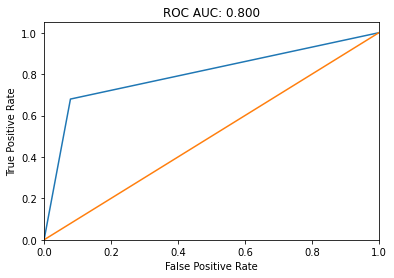

In [391]:
plot_roc_curve(test_predictions_knn, y_test)

**Построим дерево решений без настройки параметров**

In [392]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

first_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
first_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [393]:
print("Train quality")
quality_report(first_tree.predict(X_train), y_train)

print("\nTest quality")
quality_report(first_tree.predict(X_test), y_test)

Train quality
Accuracy: 0.856
Precision: 0.791
Recall: 0.825
f1_score: 0.808

Test quality
Accuracy: 0.817
Precision: 0.757
Recall: 0.765
f1_score: 0.761


Построим ROC-кривую

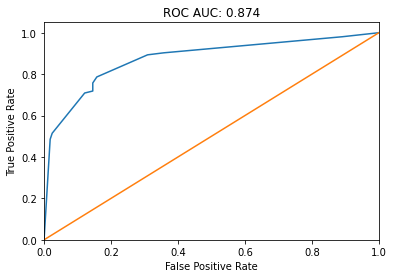

In [394]:
plot_roc_curve(first_tree.predict_proba(X_test)[:, 1], y_test)

## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

**Построим дерево решений с настройкой параметров с помощью GridSearch**

In [395]:
tree_params = {
               'max_depth': list(range(3,11)), 
               'min_samples_leaf': list(range(3,11)),
               'class_weight': [None, 'balanced']
}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                                 tree_params, 
                                 verbose=True, n_jobs=-1, cv=5,
                                scoring='roc_auc')
locally_best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    4.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                     

Посмотрим на лучшие параметры модели и на оценку прогнозирования

In [396]:
locally_best_tree.best_params_, round(locally_best_tree.best_score_, 3)

({'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 3}, 0.862)


Оценим точность на тестовой выборке

In [397]:
quality_report(locally_best_tree.predict(X_test), y_test)

Accuracy: 0.825
Precision: 0.777
Recall: 0.769
f1_score: 0.773


Построим ROC-кривую

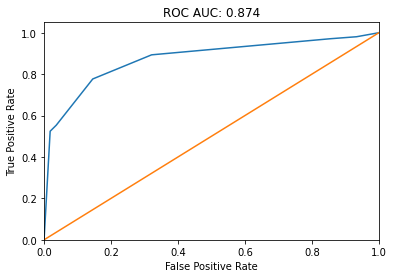

In [398]:
plot_roc_curve(locally_best_tree.predict_proba(X_test)[:, 1], y_test)

**Используем логистическую регрессию**

In [399]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

In [401]:
sfk = StratifiedKFold(n_splits=5)

logit_cv = LogisticRegressionCV(Cs=1000, cv=sfk, solver='lbfgs')

logit_cv.fit(X_train, y_train)

quality_report(logit_cv.predict(X_test), y_test)




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.836
Precision: 0.777
Recall: 0.792
f1_score: 0.784


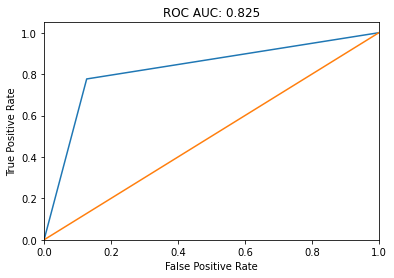

In [402]:
plot_roc_curve(logit_cv.predict(X_test), y_test)

**Построим RandomForest**

In [405]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [406]:
from sklearn.ensemble import RandomForestClassifier

# Инициализируем случайный лес с 100 деревьями и сбалансированными классами 
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                            random_state=42, oob_score=True, 
                            class_weight='balanced')

## Будем искать лучшие параметры среди следующего набора
parameters = {'max_features': [1, 2, 4], 
              'min_samples_leaf': [3, 5, 7, 9], 
              'max_depth': [5,10,15]}


gcv = GridSearchCV(rf, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   39.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                         

In [407]:
gcv.best_params_, round(gcv.best_score_, 3)

({'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 3}, 0.814)

In [410]:
quality_report(gcv.best_estimator_.predict(X_test), y_test)

Accuracy: 0.806
Precision: 0.767
Recall: 0.738
f1_score: 0.752


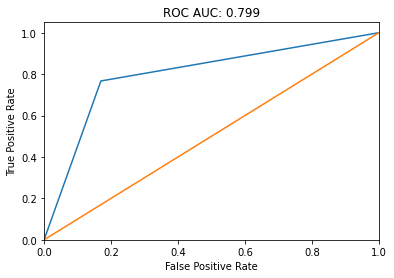

In [411]:
plot_roc_curve(gcv.best_estimator_.predict(X_test), y_test)

## Выводы
### Задание 9 (3 балла)
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?

В результате тестов всех алгоритмов классификация, лучший результат показало дерево решений. Я протестировал нормализацию количественных данных, результат удивил. При использовании нормализации, все алгоритмы показывали качесто хуже, чем если бы нормализации не было.

Возможно еще можно улучшить качество прогнозирования, если синтезировать дополнительно признаки. У меня нет больше идей как можно вытянуть доолнительные признаки.

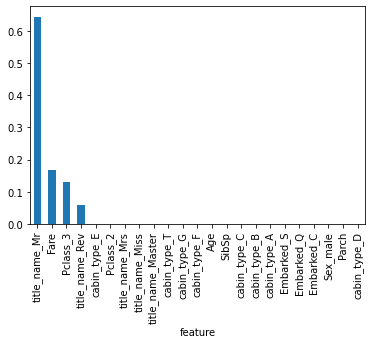

In [413]:

featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": locally_best_tree.best_estimator_.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar')

Самыми важными признаками при прогнозировани с помощью алгоритма дерево решений оказались: семейное положение мужчины Mr, стоимость билета и каюта в 3 классе.